<a href="https://colab.research.google.com/github/lynchd11/Data-1/blob/main/BTC_Halving_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

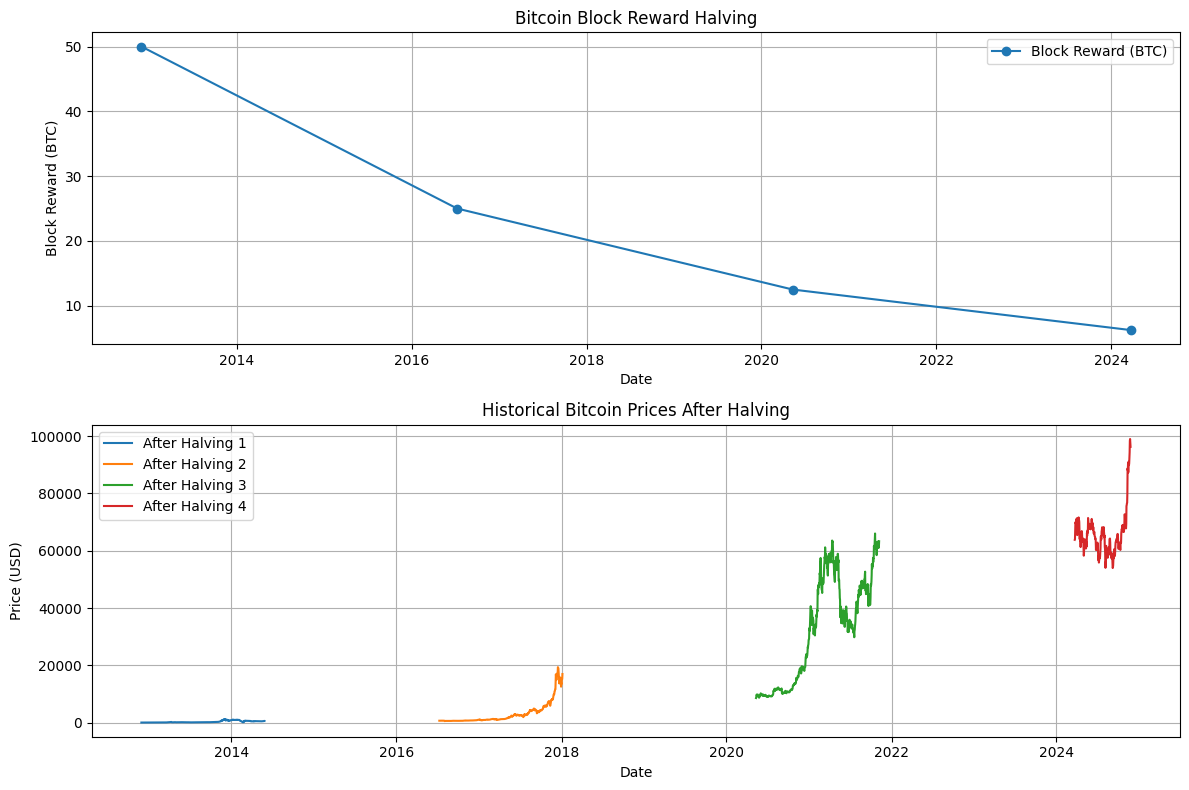

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import requests

# Function to fetch historical Bitcoin prices
def fetch_historical_prices(start_date, end_date):
    url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&toTs={end_date}"
    response = requests.get(url)
    data = response.json()['Data']['Data']
    prices = [(pd.to_datetime(d['time'], unit='s'), d['close']) for d in data if d['time'] >= start_date]
    return prices

# Historical Bitcoin block halving data
halving_dates = {
    'Date': ['2012-11-28', '2016-07-09', '2020-05-11', '2024-03-22'],
    'Block Reward': [50, 25, 12.5, 6.25]
}

# Convert to DataFrame
halving_df = pd.DataFrame(halving_dates)
halving_df['Date'] = pd.to_datetime(halving_df['Date'])


# Fetch historical prices following each halving
historical_prices = []
for index, row in halving_df.iterrows():
    start_date = int(row['Date'].timestamp())
    end_date = int((row['Date'] + pd.DateOffset(days=545)).timestamp())  # Fetch prices for one year after halving
    prices = fetch_historical_prices(start_date, end_date)
    historical_prices.append(prices)

# Plotting
plt.figure(figsize=(12, 8))

# Plot block rewards
plt.subplot(2, 1, 1)
plt.plot(halving_df['Date'], halving_df['Block Reward'], marker='o', linestyle='-', label='Block Reward (BTC)')
plt.title('Bitcoin Block Reward Halving')
plt.xlabel('Date')
plt.ylabel('Block Reward (BTC)')
plt.grid(True)
plt.legend()

# Plot historical prices
plt.subplot(2, 1, 2)
for i, prices in enumerate(historical_prices):
    dates = [price[0] for price in prices]
    prices = [price[1] for price in prices]
    plt.plot(dates, prices, label=f'After Halving {i+1}')
plt.title('Historical Bitcoin Prices After Halving')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
